In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, Dense

# Load the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Define the encoder
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

# Define the decoder

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

# Combine encoder and decoder into an auto-encoder model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the model
autoencoder.fit(x_train, x_train,
                epochs=3,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# Evaluate the model
decoded_imgs = autoencoder.predict(x_test)



2025-04-25 09:39:43.577498: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-25 09:39:43.578943: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-25 09:39:43.582530: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-25 09:39:43.591657: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745573983.606320   11344 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745573983.61

Epoch 1/3
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.3422 - val_loss: 0.1656
Epoch 2/3
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1581 - val_loss: 0.1365
Epoch 3/3
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1343 - val_loss: 0.1244
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Epoch 1/3
235/235: This indicates that the training process has completed all 235 steps (or batches) for the first epoch. In this case, it means that the model has processed all the batches of the training data for one epoch.

4s 10ms/step: This shows the time taken to process each step (or batch). Here, it took approximately 4 seconds and 10 milliseconds per step.

loss: 0.3422: This is the loss value calculated on the training data at the end of the epoch. A lower loss value generally indicates better model performance.

val_loss: 0.1656: This is the loss value calculated on the validation data at the end of the epoch. The validation loss helps to monitor the model's performance on unseen data and can be used to detect overfitting.

In [4]:
len(x_train)
x_train.shape

(60000, 784)

### Explanation of the Number 235 in the Log

log: 235, but we set 256. Why?
In the MNIST dataset, there are 60,000 training samples. When you set a batch size of 256, the number of steps per epoch is calculated as the total number of training samples divided by the batch size.

Here's the calculation:
$$ \text{Number of steps per epoch} = \frac{\text{Total number of training samples}}{\text{Batch size}} = \frac{60,000}{256} \approx 234.375 $$


In [7]:
type(x_train)

numpy.ndarray

# Initialize model parameters
initialize_model_parameters()

# Divide dataset into mini-batches of 5 samples each
mini_batches = divide_dataset_into_mini_batches(dataset, batch_size=5)

# Loop through each epoch
for epoch in range(num_epochs):
    # Loop through each mini-batch
    for mini_batch in mini_batches:
        # Forward pass: Compute output predictions
        predictions = forward_pass(model, mini_batch)

        # Compute loss: Calculate loss for the mini-batch
        loss = compute_loss(predictions, mini_batch_targets)

        # Backward pass: Compute gradients of the loss with respect to model parameters
        gradients = backward_pass(loss, model_parameters)

        # Update model parameters: Use gradients to update model parameters
        update_model_parameters(model_parameters, gradients)

    # End of epoch: Optionally, evaluate model performance on validation set
    validation_loss = evaluate_model(model, validation_set)
    print(f"Epoch {epoch+1}/{num_epochs} - Validation Loss: {validation_loss}")

# End of training: Optionally, save the trained model
save_model(model)


#### Batch Training
    Batch training involves dividing the dataset into smaller batches and processing each batch independently. This approach is beneficial for large datasets as it reduces memory usage and can speed up training. The batch size determines the number of samples processed before the model is updated. Common batch sizes include 32, 64, 128, and 256. The choice of batch size can affect the model's performance and training time.
#### Mini-Batch Training
Mini-batch training is a variant of batch training where the dataset is divided into smaller batches, typically ranging from 1 to 256 samples. This approach strikes a balance between batch training and stochastic training, providing faster convergence and more stable updates. Mini-batch training is widely used in practice due to its efficiency and effectiveness.
#### Stochastic Training
Stochastic training, also known as online training, involves updating the model parameters after processing each individual sample. This approach can lead to faster convergence but may result in noisy updates. Stochastic training is suitable for small datasets or scenarios where real-time updates are required.

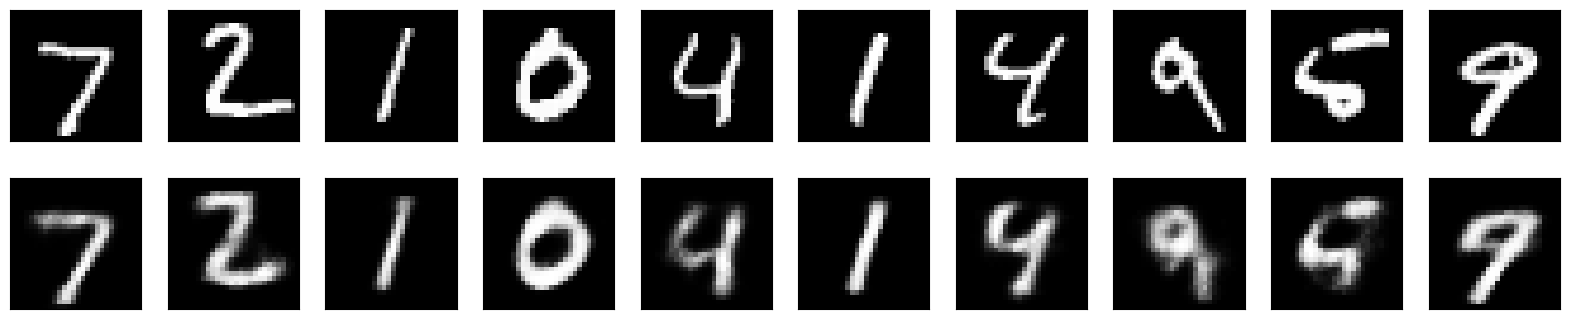

In [2]:
# Visualize the results
n = 10  # Number of digits to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
